In [1]:
from IPython.display import Image, display
import sys
import os
sys.path.append(os.path.abspath(".."))

# Project Overview: Data Normalization for Power BI Modeling
In this notebook, we shall explore the report created in Power BI, along with some insights . Having normalised the tables in the previous notebook, we imported these files into Power BI.

## The Model
The result of the normalisation process is visualised in the Power BI data model below. A total of 20 tables are included, comprising dimension tables, fact tables, and bridging tables to support many-to-many relationships. We note that Power BI successfully detected and enforced the appropriate relationships and cardinalities between tables. With all these tables and relationships, there is undoubtedly a lot we can uncover but we will focus on a selected subset of the data to demostrate some features of the data.

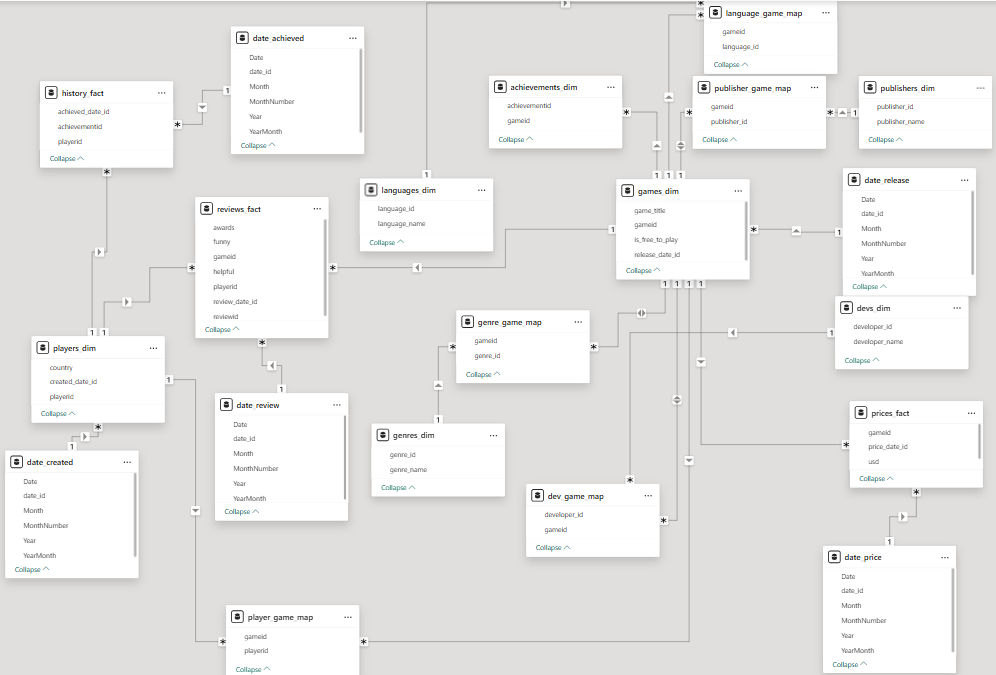

In [2]:
image_path = "../images/the_model.png"  
display(Image(filename=image_path))

# The Report
## Key Figures
The initial state of the report is shown below. We begin with the cards on the first row:
- `Total Games` is the total number of unique games in the normalised data.
- `Total Achievements` is the sum of all achievements in the 92k games, regardless of whether they have been achieved at least once.
- `Total Players` is the total number of players who have at least one game in their library (whether paid or not). You will recall that in the previous notebook there were ~425k unique `playerid`s. Some players may create accounts but not add games to their library so we have decided on a more focused analysis here by limiting the report to the players who have at least one game.
- `Min. Game Price` is the minimum (paid) game price. You will recall tha the prices are temporal, recorded on multiple days for each game. To this minimum is the minimum over *ALL* games and dates (from 28 November 2024 to 24 February 2025).
- `Max. Game Price` is, similar to the minimum, the maximum game price over the period for which the data was collected.
- `Avg. Game Price` is the average (paid) game price over the period specified above. So this excludes the 'Free to play' games.

The one thing that immediately jumps out is the maximum game price of $1000. This piqued my interest and upon investigating discovered that this 

In [31]:

html = """
<div style="text-align: center;">
  <img src="../images/the_report.png" width="800"><br>
  <span style="font-weight: bold;">The Report</span>
</div>
"""

display(HTML(html))


## Visuals
Rows two and three have some visuals. We briefly go through these visuals before going into specifics about some insights.
- **Top 10 Publishers by Game count** bar chart shows which publishers are most active in publishing. Big Fish Games is shown as the top publisher.
- **Top 10 Developers by Game count** contains similar infomation to the publishers bar chart. Here, the developers 'EroticGamesClub' are leading the way.
- **Top 10 Genres by Game count** shows the dominating genres, with the Indie genre having the most amount of games.
- **Free to Play vs Paid Gamees** pie chart shows the split between paid games and free to play games, with 'Paid' games taking up 84% of the games.
- **Top Games by Player count and Review count**. Just below the pie chart we have the games with most players and most reviews, both of these being 'Counter-Strike 2', which incidentally on further investigation is a Free to Play game which suggests why it is so popular.
- **Average and Median Game Prices** is a graph showing the trend of average and median game prices from 28 November 2024 to 24 February 2025. Again, recall that price is temporal, and for each game there are multiple prices. Here we plot the (average and median) game prices on each recorded date to show how pricing evolved over the two months that this data was collected. The lower prices around beginning of December are due to the Steam Black Friday sale which ran from 27 November 2024 to 4 December 2024, after which the prices went back to normal. The second dip in prices is due to the Steam Christmas Sale which started on 19 December 2024 and ended on 2 January 2025. 

Each visual is filterable by slicers such as release year, genre, and free-to-play status, all of which allow the user to explore what they may be interested in.

## Slicer Panel
On the left hand side we have two buttons. A filter button which, when clicked, produces a slicer panel as seen below which allows the user the slice the data in anyway they want in the following fields:
- **Year released** : which will allow the user to see different patterns over the 27 years (1997 - 2024) that the data has been collected, including, for example, which genre was the top genre in a given year, which publisher was leading the way and which game had the highest number of players. All the graphics and cards on the page react to this slicer except the prices trend graph. 
- **Genre** : also allows the user to explore the trends and interesting statistics of their genre of interest. For example, they may want to determine the total number of players in the 'Action' genre, and the price trend for that genre. Of course we already have the Top Ten genres bar chart where the user can click on a genre and the page updates, but this is limited to the top 10 genres, yet the user may be interested in a genre not in the top ten. This slicer does not affect the **Top 10 Genres by Game count** bar chart since it will just reduce to one bar, which is the selected genre.
- **Developer**: similar to the genres slicer will aloow the user to explore statistics and trends for their chosen developer. This slicer does not affect the **Top 10 Developers by Game Count** bar chart since, again, this would just show the one developer.

The backwards arrow allows the user to hide the panel so they can study the state of the report given their slicers. Then to clear all slicers and return to the original state of the report, the user can click the button below the filter icon.

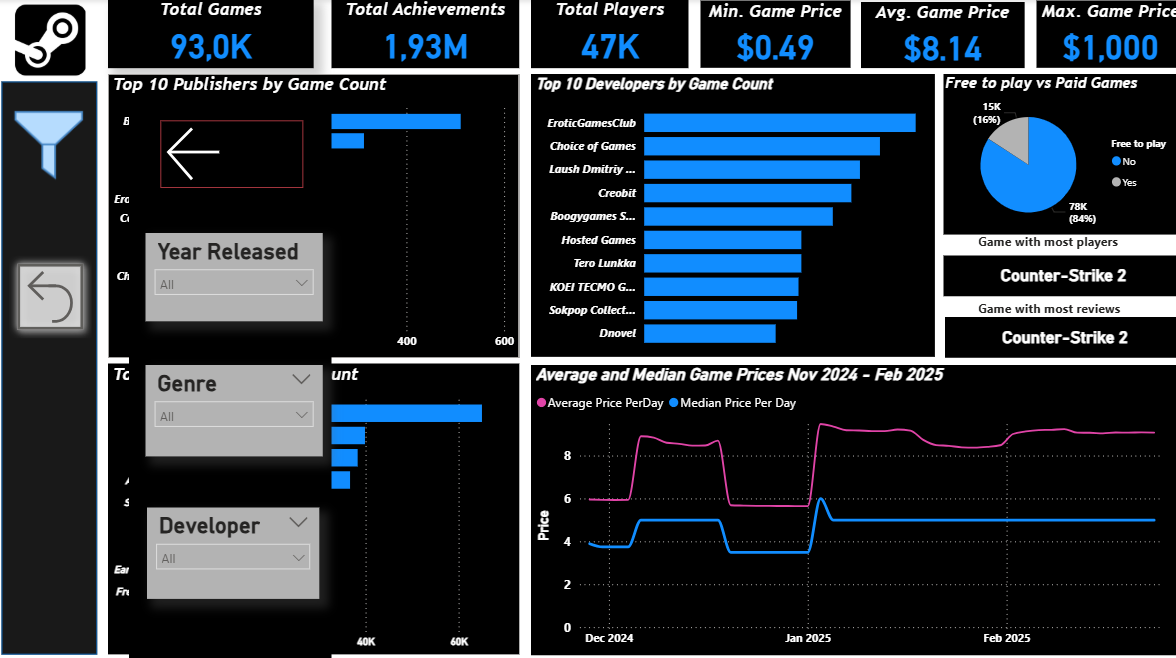

In [24]:
image_path = "../images/slicer.png"  
display(Image(filename=image_path, width=600, height=600))

### Top Publishers
As noted above, Big Fish Games leads the way with 511 games. Although they have a relatively large proportion of the games, only 233 players have these games in their library. The dominating genre for this publisher is 'Casual', followed by adventure. Prices for this publisher's games are relatively stable, only dropping during the aforementioned Sales events. 


In [28]:
html = """
<div style="text-align: center;">
  <img src="../images/top_pub.png" width="600"><br>
  <span style="font-weight: bold;">Top Publisher</span>
</div>
"""

display(HTML(html))


### Top Genre
The dominating genre is 'Indie' with 65k games and ~45k players having at least one indie game in their library. Interestingly, the maximum game price is $1000. Indie games are usually known for being on the cheaper end so this is likely standout outlier price. Unturned is the game with the most number of players. On further exploration we found that this game is 'Free to Play' which could explain its popularity. 'Rust' in turn has the most number of reviews. 


In [8]:
from IPython.display import HTML

In [29]:
html = """
<div style="text-align: center;">
  <img src="../images/top_genre.png" width="600"  height="600"><br>
  <span style="font-weight: bold;">Top Genre</span>
</div>
"""

display(HTML(html))


### Recent Years in Gaming
Using the year slicer, we can explore the past few years in gaming on Steam. The states of the page below show the visuals and statistics for games released in 2024 and 2023. 
- About 17k games were released in the last yeat, with FOR HONOR having the most amount of players.  HELLDIVERS 2 led the way with the most amount of reviews. This is rather unsurprising due to the [Playstation account controversy](https://en.wikipedia.org/wiki/Helldivers_2#PSN_account_controversy)
- In 2023 the game with the most reviews was Baldur's Gate 3, which is unsurprsing due to its critical aclaim and the subsequent winning of multiple ['Game Of The Year awards'](https://en.wikipedia.org/wiki/Baldur%27s_Gate_3#Accolades)

In [17]:
html = """
<div style="display: flex; gap: 40px;">
  <div style="text-align: center;">
    <img src="../images/year2024.png" width="500"><br>
    <span>Year 2024</span>
  </div>
  <div style="text-align: center;">
    <img src="../images/year2023.png" width="500"><br>
    <span>Year 2023</span>
  </div>
</div>
"""

display(HTML(html))
